# Assignment 2 - Group 13
## **Information Retrieval In High Dimensional Data**
  Group members | IDs
: | :---
**Hoang Giang Dang**| 03676899
**Julian Bärtschi**  | 03738123
**Lukas Vogtmann** | 03745272
**Anja Pilz** | 03729350
**Aman Kumar**  | 03722433
**Lisa-Yao Gan** | 03695778
**Estefania Tealdo** | 03717779

# Task 1


## 1.1
  Provide a normalized vector $\hat{ \mathbf{s}}\in \mathbb{R}^p$, such that 
>$\hat{ \mathbf{s}}=\arg\max_{\mathbf{s} \text{ s.t. } \|\mathbf{s}\|=1}\mathbf{s}^{\top}\Sigma\Sigma^\top \mathbf{s}$ 




Solution:
$\hat{ \mathbf{s}}=\begin{bmatrix}
1 & 0 & \dots & 0
\end{bmatrix}^\top$

First note that because $\Sigma$ is diagonal the agrument of the maximisation can be rewritten as a sum: $\mathbf{s}^{\top}\Sigma\Sigma^\top \mathbf{s}= \sum_{i=1}^p \sigma_{i,i}^2 s_i^2,$ where $s_i$ denotes the $i$-th element of the vector $\mathbf{s}$. As $\|\mathbf{s}\|=\sum_{i=1}^p s_{i}^2=1,$ $s_{i}^2\geq 0$ and $\sigma_{1,1} \geq \dots \geq \sigma_{p,p},$ the sum $\sum_{i=1}^p \sigma_{i,i}^2 s_i^2$ is maximized if $s_{1}=1$ and all other elements are zero.


## 1.2
 Show that the empirical variance of the inner product of the columns of $\mathbf{X}$ with a normalized vector $\mathbf{a}$,
>$\frac{1}{N}\sum_{i=1}^{N}(\mathbf{a}^\top \mathbf{x}_i)^2=\frac{1}{N}\mathbf{a}^\top\mathbf{X}\mathbf{X}^\top\mathbf{a},$

is maximized when $\mathbf{a}$ is set to the first column of $\mathbf{U}$, i.e. $\mathbf{a}=\mathbf{u}_1$


Solution: Write $\mathbf{a}$ as
$\mathbf{a}=\underbrace{\begin{bmatrix}
\mathbf{u}_1 & \mathbf{u}_2 & \dots & \mathbf{u}_p
\end{bmatrix}}_{\mathbf{U}} \mathbf{s}=\mathbf{U} \mathbf{s}$

The norm constraint on $\mathbf{a}$ is not affected because $\mathbf{U}$ is a unitary matrix and multiplication of any vector with a unitary matrix does not change its euclidean norm. As $\|\mathbf{s}\|^2=1$ per definition we get that $\|\mathbf{a}\|=1$. 

Reformulation of the problem gives us

>$\frac{1}{N}\mathbf{a}^\top\mathbf{X}\mathbf{X}^\top\mathbf{a}= \frac{1}{N} \mathbf{s}^\top\mathbf{U}^\top\mathbf{X}\mathbf{X}^\top\mathbf{U}\mathbf{s}= \frac{1}{N} \mathbf{s}^\top\mathbf{U}^\top\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top\mathbf{U} \mathbf{s}= \frac{1}{N}\mathbf{s}^{\top}\Sigma\Sigma^\top \mathbf{s}$

We know from above that $\mathbf{s}^{\top}\Sigma\Sigma^\top \mathbf{s}$ is maximized by $\hat{ \mathbf{s}}=\begin{bmatrix}1 & 0 & \dots & 0\end{bmatrix}^\top$ and thus, $\frac{1}{N}\mathbf{a}^\top\mathbf{X}\mathbf{X}^\top\mathbf{a}$ is maximized for $\mathbf{a}=\mathbf{U}\hat{ \mathbf{s}}=\mathbf{u}_1$

# Task 2

## Import

In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import regex as re
import imageio

### Define function to read image data from directory

In [2]:
def import_images(general_dir, exact_dir, img_type='png', img_rows=50, img_columns=50):
    """
    Reads in image data of directory and returns vectorized and normalized matrix of images.
    Input:
        data_dir : directory with image data
            './task2_data/yaleBfaces/subset0'
        img_type : type 
            'png'
        img_row : number of rows of image (image size: img_row x img_columns)
        img_columns : number of columns of image (image size: img_row x img_columns)
    Output:
        X_data : vectorized, normalized Matrix of image data
        X_labels : vector of image labels (person number from file name)
    """
    # set directory with filetype
    files = glob.glob(general_dir + exact_dir + '*.'+ img_type)
    # get number of images
    n = len(files)
    # get number of pixels per image (image size img_size)
    m = img_rows*img_columns
    # initilalize array
    X_data = np.zeros((m, n))
    # initialize label vector 
    X_labels = np.zeros((1,n))
    for i, file in enumerate(files):
        # extract label from image name (e.g.: "person07_n" -> label = 7 )
        X_labels[0,i] = re.search('person(\d+)',file).group(1)
        # read images, vectorize and normalize them
        X_data[:, i] = np.array(imageio.imread(file)).astype(np.float64).ravel()/255
    return X_data, X_labels

### Write a function that takes as an input matrix T of vectorized images and returns singular vectors.

In [3]:
def get_singular_vectors(T, threshold=0):
    """
    Takes Matrix T of vectorized images and returns the 20 first singular vectors U[:,1], ... U[:,20].
    Input:
        T : Matrix of vectorized images 
            (2500 x n)
    Output:
        U : first 20 singular vectors
    """
    # SVD of training data 
    U, S, V= np.linalg.svd(T, full_matrices=False)
    
    # threshold singular vector values (not needed)
    U[abs(U)<threshold] = 0
    
    return U[:,:20]

### Define directory and image shape

In [4]:
general_dir = './task2_data/yaleBfaces/'
training_dir = '/subset0/'
test_dirs = ['/subset1/','/subset2/','/subset3/','/subset4/']
img_type = 'png'
img_rows = 50
img_columns = 50

### Get singular vectors of training images and plot the first 3

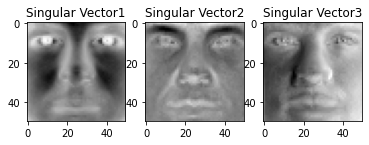

In [5]:
# load training data
X_train, X_train_labels = import_images(general_dir, training_dir, img_type, img_rows, img_columns)

# get singular vectors
X_singular_vectors = get_singular_vectors(X_train)

# plot first 3 singular vectors
for i, vector in enumerate(X_singular_vectors[:,:3].T, 1):
    plt.subplot(1, 3, i)
    plt.imshow(vector.reshape(img_rows,img_columns), cmap='gray')
    plt.title('Singular Vector{}'.format(i))
plt.show()

In [6]:
def classify_images(T, T_labels, S, S_labels, singular_vectors, n_principal_components):
    """
    Takes Matrices T and S of vectorized images, Vectors T_labels and S_labels of correspoding labels,
    as well as the singular vectors and the number of principal components to use. 
    Returns the fraction of missclassified images.
    Input:
        T : Matrix of vectorized images for training
            (2500 x n_train)
        T_labels : Vector of labels corresponding to Matrix T
            (1 x n_train)
        S : Matrix of vectorized images 
            (2500 x n_test)
        S_labels : Vector of labels corresponding to Matrix S
            (1 x n_test)
        singular_vectors : first 20 singular vectors
            (2500 x 20)
        n_principal_components : number of principal components to use
            k
    Output:
        error_rate : fraction of missclassified images
    """
    # project training data on subspace (U @ U.T @ x) according to page 25 of lecture notes.
    training_projections =  np.matmul(singular_vectors[:,:n_principal_components], singular_vectors[:,:n_principal_components].T) @ T
    # project training data on subspace (U @ U.T @ x) according to page 25 of lecture notes.
    test_projections = np.matmul(singular_vectors[:,:n_principal_components], singular_vectors[:,:n_principal_components].T) @ S
    
    # creating (sklearn) KNN model with 3 neighbors and euclidian distance (p=2) measurement.
    mdl = KNeighborsClassifier(n_neighbors=3, p=2)
    # fitting the model
    mdl.fit(training_projections.T, T_labels.T.ravel())
    # predict labels of input data
    prediction = mdl.predict(test_projections.T)
    
    # calculate fraction of missclassified images
    error_rate = sum([1 for x in (prediction.reshape(-1, 1)-S_labels.T) if x!=0])/len(S.T)
    return error_rate

### Classify different subsets of data using a 3-nearest neighbor classifier (in reduced space)

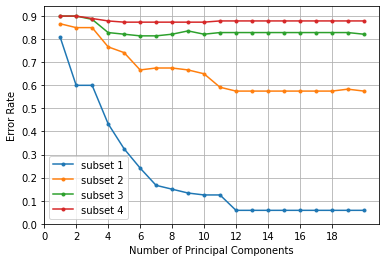

In [7]:
from sklearn.neighbors import KNeighborsClassifier

test_dirs = ['/subset1/','/subset2/','/subset3/','/subset4/']

# create figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# classify different subsets of test data
for i, subset in enumerate(test_dirs):
    # import test images
    data, labels = import_images(general_dir, subset, img_type, img_rows, img_columns)
    error_rates = []
    ks = []
    # for k = 1..20 Principal Components
    for k in range(1,21):
        # get error rate of test images
        error_rates.append(classify_images(X_train, X_train_labels, data, labels, X_singular_vectors, k))
        ks.append(k)
    # plot error rates
    plt.plot(ks, error_rates, '.-', label='subset {}'.format(i+1))
# plot information
plt.ylabel('Error Rate')
plt.xlabel('Number of Principal Components')
plt.legend(loc='best')
# set ticks for better grid spacing
ax.set_xticks(np.arange(0, 20, 2))
ax.set_yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

### Repeat experiment without using the first three Principal Components

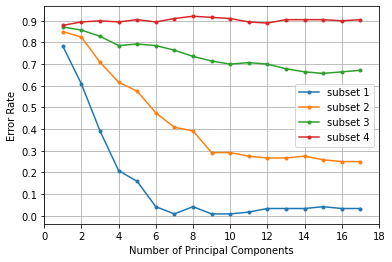

In [8]:
# create figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# classify different subsets of test data
for i, subset in enumerate(test_dirs):
    data, labels = import_images(general_dir, subset, img_type, img_rows, img_columns)
    error_rates = []
    ks = []
    # for k = 1..17 Principal Components (vectors 4..20, leave first three out in function call below "X_singular_vectors[:,3:]")
    for k in range(1,18):
        # get error rate of test images
        error_rates.append(classify_images(X_train, X_train_labels, data, labels, X_singular_vectors[:,3:], k))
        ks.append(k)
    # plot error rates
    plt.plot(ks, error_rates, '.-', label='subset {}'.format(i+1))
# plot information
plt.ylabel('Error Rate')
plt.xlabel('Number of Principal Components')
plt.legend(loc='best')
# set ticks for better grid spacing
ax.set_xticks(np.arange(0, 20, 2))
ax.set_yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

Counterintuitively, the model performed better in the second experiment (without the first three Principal Components) than in the first experiment. We assume, that the first three Principal Components "learn" the illumination of the well lighted pictures of the training data set. When these are omitted, the model actually apprehends more information of the facial structure and hence performs better on the test data.